In [ ]:
!pip install shap
!pip install xport
import numpy as np
import pandas as pd
pd.set_option('use_inf_as_na', True)
pd.set_option("display.max_columns",None)
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import seaborn as sns
import shap 
import warnings
warnings.filterwarnings("ignore")
import xgboost as xgb
import xport, csv


from google.colab import drive
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from scipy import stats
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score,classification_report,roc_curve, auc, confusion_matrix,precision_recall_curve 
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

drive.mount('/content/drive/')

     |████████████████████████████████| 1.5 MB 5.0 MB/s 
     |████████████████████████████████| 462 kB 45.2 MB/s 
     |████████████████████████████████| 564 kB 4.9 MB/s 
Mounted at /content/drive/


In [ ]:
path='drive/My Drive/vip/test.csv'
df=pd.read_csv(path)

In [ ]:
df=df.set_index('Subject_ID')
df

,Sex,Age,Temperature,HemoCue,Malaria,Headache,Chills,Aches_or_pains,Fatigue,Vomiting,Lack_of_appetite,Cough,Dizziness,Sweating,Abdominal_pain,Diarrhea,Lower_back_pain,Eye_pain,Paleness,Chest_pain,Rash,Ear_pain
Subject_ID,,,,,,,,,,,,,,,,,,,,,,
R2377,Female,60,101.8,8.8,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
R4453,Male,56,96.6,14.8,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
R2420,Female,4,90.0,12.5,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
R5505,Male,35,96.4,14.7,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
R4285,Male,50,96.4,14.3,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R5265,Female,40,99.0,12.9,0,1,1,1,0,0,0,1,0,0,0,0,1,1,0,1,0,0
R4769,Female,64,99.3,11.1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,0,0,0
R4647,Female,37,99.0,12.4,0,1,1,1,0,0,0,1,0,0,0,0,1,1,0,1,0,1


In [ ]:
df['Gender'] = df['Sex'].map( {'Male':1, 'Female':0} )
df

,Sex,Age,Temperature,HemoCue,Malaria,Headache,Chills,Aches_or_pains,Fatigue,Vomiting,Lack_of_appetite,Cough,Dizziness,Sweating,Abdominal_pain,Diarrhea,Lower_back_pain,Eye_pain,Paleness,Chest_pain,Rash,Ear_pain,Gender
Subject_ID,,,,,,,,,,,,,,,,,,,,,,,
R2377,Female,60,101.8,8.8,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
R4453,Male,56,96.6,14.8,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
R2420,Female,4,90.0,12.5,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
R5505,Male,35,96.4,14.7,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
R4285,Male,50,96.4,14.3,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R5265,Female,40,99.0,12.9,0,1,1,1,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0
R4769,Female,64,99.3,11.1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,0,0,0,0
R4647,Female,37,99.0,12.4,0,1,1,1,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0


In [ ]:
del df['Sex']
df

,Age,Temperature,HemoCue,Malaria,Headache,Chills,Aches_or_pains,Fatigue,Vomiting,Lack_of_appetite,Cough,Dizziness,Sweating,Abdominal_pain,Diarrhea,Lower_back_pain,Eye_pain,Paleness,Chest_pain,Rash,Ear_pain,Gender
Subject_ID,,,,,,,,,,,,,,,,,,,,,,
R2377,60,101.8,8.8,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
R4453,56,96.6,14.8,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
R2420,4,90.0,12.5,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
R5505,35,96.4,14.7,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
R4285,50,96.4,14.3,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R5265,40,99.0,12.9,0,1,1,1,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0
R4769,64,99.3,11.1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,0,0,0,0
R4647,37,99.0,12.4,0,1,1,1,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0


## Train Test Split

In [ ]:
y = df["Malaria"]
X = df.drop('Malaria', axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()
estimators=[10,50,100,500]
depths=[4,8,10,20] 
hyperparameters = dict(n_estimators=estimators, max_depth=depths)
clf = GridSearchCV(rf, hyperparameters, scoring = 'roc_auc', cv=3, verbose=3)

clf.fit(X_train, y_train)
print(clf.best_params_, clf.best_score_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END ......max_depth=4, n_estimators=10;, score=0.895 total time=   0.0s
[CV 2/3] END ......max_depth=4, n_estimators=10;, score=0.736 total time=   0.1s
[CV 3/3] END ......max_depth=4, n_estimators=10;, score=0.749 total time=   0.0s
[CV 1/3] END ......max_depth=4, n_estimators=50;, score=0.878 total time=   0.2s
[CV 2/3] END ......max_depth=4, n_estimators=50;, score=0.678 total time=   0.2s
[CV 3/3] END ......max_depth=4, n_estimators=50;, score=0.702 total time=   0.2s
[CV 1/3] END .....max_depth=4, n_estimators=100;, score=0.920 total time=   0.4s
[CV 2/3] END .....max_depth=4, n_estimators=100;, score=0.719 total time=   0.6s
[CV 3/3] END .....max_depth=4, n_estimators=100;, score=0.705 total time=   0.5s
[CV 1/3] END .....max_depth=4, n_estimators=500;, score=0.902 total time=   2.4s
[CV 2/3] END .....max_depth=4, n_estimators=500;, score=0.706 total time=   2.1s
[CV 3/3] END .....max_depth=4, n_estimators=500;

In [ ]:
b_model = RandomForestClassifier(max_depth=4,n_estimators=500)
b_model.fit(X_train,y_train)
best_tree_predictions = b_model.predict(X_test)
b_model.score(X_test, y_test)

0.9700598802395209

In [ ]:
print('Accuracy: ',accuracy_score(y_test, best_tree_predictions))
print(classification_report(y_test, best_tree_predictions, digits=5))
print('Confusion Matrix:',confusion_matrix(y_test,best_tree_predictions))

Accuracy:  0.9700598802395209
              precision    recall  f1-score   support

           0    0.96914   1.00000   0.98433       314
           1    1.00000   0.50000   0.66667        20

    accuracy                        0.97006       334
   macro avg    0.98457   0.75000   0.82550       334
weighted avg    0.97098   0.97006   0.96530       334

Confusion Matrix: [[314   0]
 [ 10  10]]


In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
auc = roc_auc_score(y_test, best_tree_predictions)
print('ROC AUC: %f' % auc)

ROC AUC: 0.750000


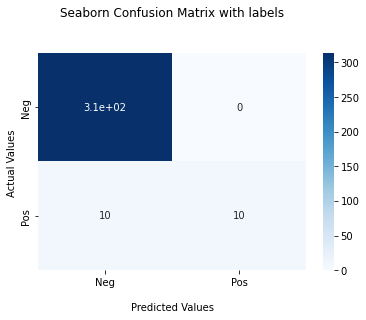

In [ ]:
import seaborn as sns

ax = sns.heatmap(confusion_matrix(y_test,best_tree_predictions), annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['Neg','Pos'])
ax.yaxis.set_ticklabels(['Neg','Pos'])

plt.show()
##10/20 TPR
##10/20 FNR
##0/314 FPR
##314/314 TNR

In [ ]:
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

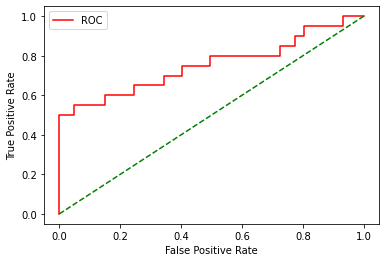

In [ ]:
prob = b_model.predict_proba(X_test)
prob = prob[:, 1]
fper, tper, thresholds = roc_curve(y_test, prob)
plot_roc_curve(fper, tper)

In [ ]:
temp = [fper, tper, thresholds]

In [ ]:
df_1=pd.DataFrame(temp)
df_1.T

,0,1,2
0,0.000000,0.00,1.587910
1,0.000000,0.05,0.587910
2,0.000000,0.50,0.517928
3,0.047771,0.50,0.090927
4,0.047771,0.55,0.089997
5,0.149682,0.55,0.069591
6,0.149682,0.60,0.069450
7,0.245223,0.60,0.056403
8,0.245223,0.65,0.056120
9,0.343949,0.65,0.050196


In [ ]:
True_Positive = tper
# Find the optimal threshold
index = np.argmax(True_Positive)
thresholdOpt = round(thresholds[index], ndigits = 4)
True_Positive_Opt = round(True_Positive[index], ndigits = 4)
print('Best Threshold: {} with True_Positive: {}'.format(thresholdOpt, True_Positive_Opt))

Best Threshold: 0.0318 with True_Positive: 1.0


In [ ]:
gmean = np.sqrt(tper * (1 - fper))

# Find the optimal threshold
index = np.argmax(gmean)
thresholdOpt = round(thresholds[index], ndigits = 4)
gmeanOpt = round(gmean[index], ndigits = 4)
fprOpt = round(fper[index], ndigits = 4)
tprOpt = round(tper[index], ndigits = 4)
print('Best Threshold: {} with G-Mean: {}'.format(thresholdOpt, gmeanOpt))
print('FPR: {}, TPR: {}'.format(fprOpt, tprOpt))

Best Threshold: 0.09 with G-Mean: 0.7237
FPR: 0.0478, TPR: 0.55


In [ ]:
from numpy import argmax
from matplotlib import pyplot

In [ ]:
# ix = argmax(True_Positive)
# print('Best Threshold=%f, True_Positive=%.3f' % (thresholds[ix], True_Positive[ix]))
# # plot the roc curve for the model
# pyplot.plot([0,1], [0,1], linestyle='--')
# pyplot.plot(fper, tper, marker='.', label='Random Forest')
# pyplot.scatter(fper[ix], tper[ix], marker='o', color='black', label='Best')
# # axis labels
# pyplot.xlabel('False Positive Rate')
# pyplot.ylabel('True Positive Rate')
# pyplot.legend()
# # show the plot
# pyplot.show()

Best Threshold=0.089997, G-Mean=0.724


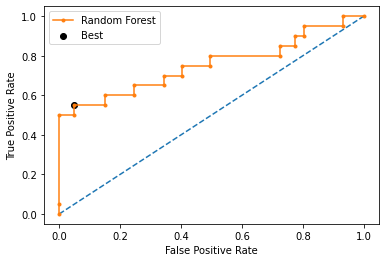

In [ ]:
ix = argmax(gmean)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmean[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--')
pyplot.plot(fper, tper, marker='.', label='Random Forest')
pyplot.scatter(fper[ix], tper[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

## Random Forest Feature Importances

Text(0.5, 0, 'Relative Importance')

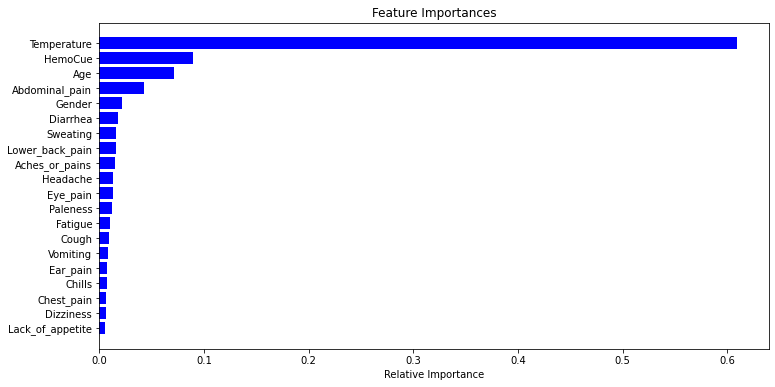

In [ ]:
feature_names = [key for key in df.drop(columns=["Malaria"])]
importances = b_model.feature_importances_
indices = np.argsort(importances)
indices = indices[-20:]
plt.figure(figsize=(12,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)),np.array(feature_names)[indices])
plt.xlabel('Relative Importance')

In [ ]:
# b_model.predict_proba(X_test)

In [ ]:
# tree_explainer = shap.TreeExplainer(b_model, X_train)

In [ ]:
tree_explainer = shap.TreeExplainer(b_model, X_train,model_output="probability")

In [ ]:
shap_values_rf = tree_explainer.shap_values(X_test,check_additivity=False)

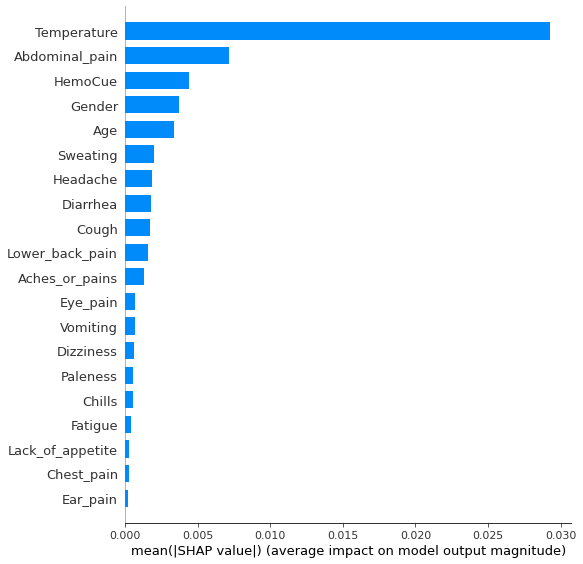

In [ ]:
shap.summary_plot(shap_values_rf[1], X_test, plot_type="bar")

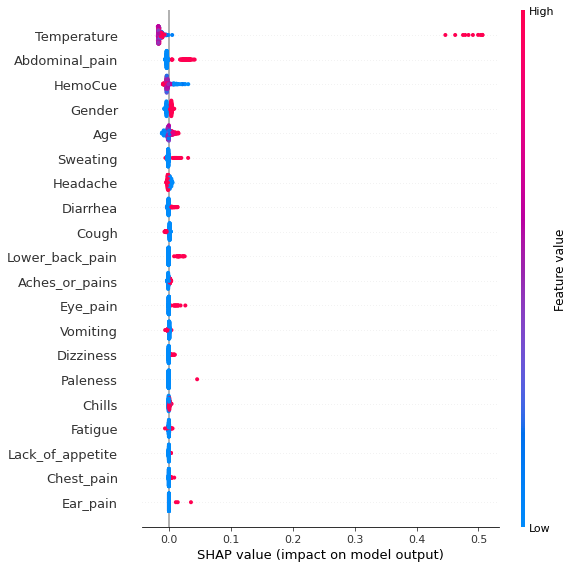

In [ ]:
shap.summary_plot(shap_values_rf[1], X_test)

In [ ]:
importances[indices]

array([0.0055745 , 0.00659719, 0.00688172, 0.00777948, 0.00783498,
       0.00851784, 0.00896408, 0.00999201, 0.01239852, 0.012774  ,
       0.01329826, 0.01479762, 0.01615968, 0.01619405, 0.01811664,
       0.02147964, 0.04300316, 0.07114813, 0.08920392, 0.60928141])

In [ ]:
gain_importances = pd.Series(importances[indices],index=np.array(feature_names)[indices])
# sort by absolute value, highest to lowest
sorted_by_abs_val = gain_importances.abs().sort_values(ascending=False).index
gain_importances = gain_importances[sorted_by_abs_val]

In [ ]:
gain_importances

Temperature         0.609281
HemoCue             0.089204
Age                 0.071148
Abdominal_pain      0.043003
Gender              0.021480
Diarrhea            0.018117
Sweating            0.016194
Lower_back_pain     0.016160
Aches_or_pains      0.014798
Headache            0.013298
Eye_pain            0.012774
Paleness            0.012399
Fatigue             0.009992
Cough               0.008964
Vomiting            0.008518
Ear_pain            0.007835
Chills              0.007779
Chest_pain          0.006882
Dizziness           0.006597
Lack_of_appetite    0.005574
dtype: float64

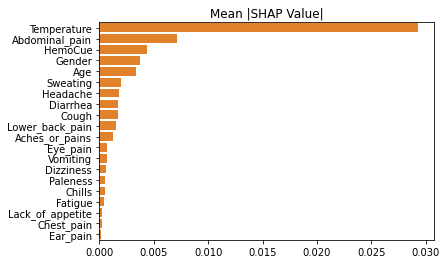

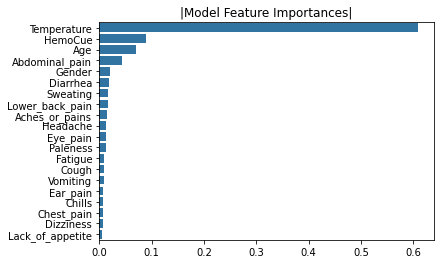

Total absolute SHAP values: 0.06 | Total absolute Model Information Gain: 1.00


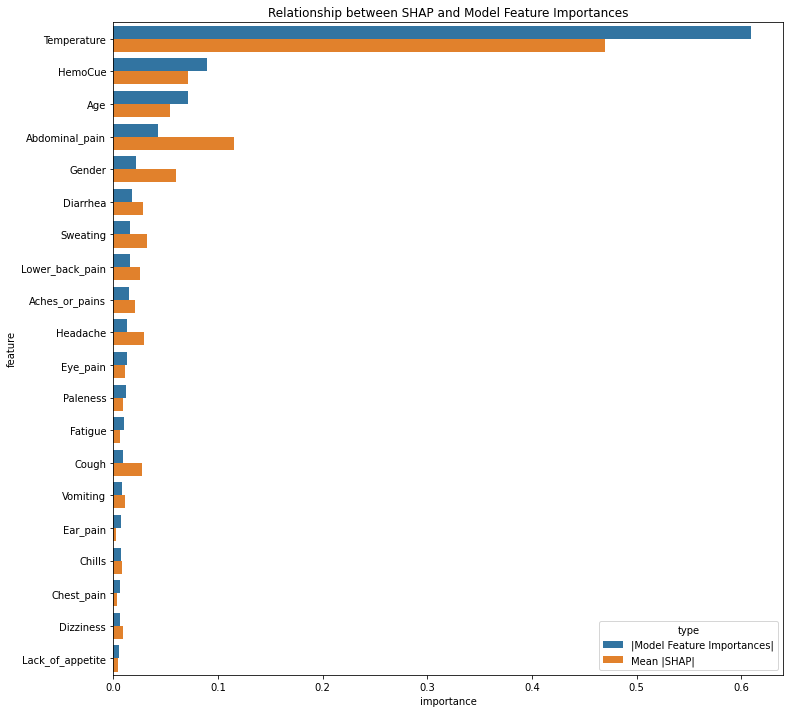

In [ ]:
mean_shap_importances_rf = (pd.DataFrame(shap_values_rf[0], columns=X_test.columns)
                         .abs()
                         .mean()
                         .sort_values(ascending=False))
top_20_mean_rf = mean_shap_importances_rf.head(20)
sns.barplot(top_20_mean_rf, top_20_mean_rf.index, color=sns.color_palette()[1])
plt.title('Mean |SHAP Value|')
plt.show()

top_20_gain = gain_importances
sns.barplot(top_20_gain, top_20_gain.index, color=sns.color_palette()[0])
plt.title('|Model Feature Importances|')
plt.show()

# To compare we rescale the average shap values 
print(f'Total absolute SHAP values: {mean_shap_importances_rf.sum():.2f} | '
      f'Total absolute Model Information Gain: {gain_importances.abs().sum():.2f}')
adj_ratio = gain_importances.abs().sum() / mean_shap_importances_rf.sum()

top_20_gain.name = '|Model Feature Importances|'
mean_shap_importances_rf.name = 'Mean |SHAP|'
combo_df = (top_20_gain.to_frame()
            .join(mean_shap_importances_rf.to_frame() * adj_ratio)
            .reset_index()
            .rename(columns={'index':'feature'})
            .melt(id_vars='feature', 
                  var_name='type', 
                  value_name='importance'))

plt.figure(figsize=(12,12))
sns.barplot(y='feature', x='importance', hue='type', data=combo_df)
plt.title('Relationship between SHAP and Model Feature Importances')
plt.show()

## Using Smote to Oversample minority class

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)

In [ ]:
X_res, y_res = sm.fit_resample(X_train, y_train)

In [ ]:
# Show the unbalanced level of the target data
def get_class_dist(data, name):
    unique, counts = np.unique(data, return_counts=True)
    pct = 100*(counts/len(data))
    d = dict(zip(unique, zip(counts, pct)))
    print(len(data), 'total examples in %s' % name)
    for key, values in d.items():
        print('class %d: %d examples,' % (key, values[0]), "{0:.2f}%".format(values[1]))
    print('')
    return

In [ ]:
get_class_dist(data=y_train, name='y_train')

1000 total examples in y_train
class 0: 936 examples, 93.60%
class 1: 64 examples, 6.40%



In [ ]:
get_class_dist(data=y_res, name='y_res')

1872 total examples in y_res
class 0: 936 examples, 50.00%
class 1: 936 examples, 50.00%



In [ ]:
rf = RandomForestClassifier()
estimators=[10,50,100,500]
depths=[4,8,10,20] 
hyperparameters = dict(n_estimators=estimators, max_depth=depths)
clf = GridSearchCV(rf, hyperparameters, scoring = 'roc_auc', cv=3, verbose=3)

clf.fit(X_res, y_res)
print(clf.best_params_, clf.best_score_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END ......max_depth=4, n_estimators=10;, score=0.889 total time=   0.0s
[CV 2/3] END ......max_depth=4, n_estimators=10;, score=0.939 total time=   0.0s
[CV 3/3] END ......max_depth=4, n_estimators=10;, score=0.941 total time=   0.0s
[CV 1/3] END ......max_depth=4, n_estimators=50;, score=0.898 total time=   0.1s
[CV 2/3] END ......max_depth=4, n_estimators=50;, score=0.943 total time=   0.1s
[CV 3/3] END ......max_depth=4, n_estimators=50;, score=0.944 total time=   0.1s
[CV 1/3] END .....max_depth=4, n_estimators=100;, score=0.908 total time=   0.2s
[CV 2/3] END .....max_depth=4, n_estimators=100;, score=0.948 total time=   0.3s
[CV 3/3] END .....max_depth=4, n_estimators=100;, score=0.943 total time=   0.4s
[CV 1/3] END .....max_depth=4, n_estimators=500;, score=0.906 total time=   0.9s
[CV 2/3] END .....max_depth=4, n_estimators=500;, score=0.946 total time=   0.9s
[CV 3/3] END .....max_depth=4, n_estimators=500;

In [ ]:
b_model_2 = RandomForestClassifier(max_depth=20,n_estimators=500)
b_model_2.fit(X_res,y_res)
best_tree_predictions_2 = b_model_2.predict(X_test)
b_model_2.score(X_test, y_test)

0.907185628742515

In [ ]:
print('Accuracy: ',accuracy_score(y_test, best_tree_predictions_2))
print(classification_report(y_test, best_tree_predictions_2, digits=5))
print('Confusion Matrix:',confusion_matrix(y_test,best_tree_predictions_2))

Accuracy:  0.907185628742515
              precision    recall  f1-score   support

           0    0.96700   0.93312   0.94976       314
           1    0.32258   0.50000   0.39216        20

    accuracy                        0.90719       334
   macro avg    0.64479   0.71656   0.67096       334
weighted avg    0.92841   0.90719   0.91637       334

Confusion Matrix: [[293  21]
 [ 10  10]]


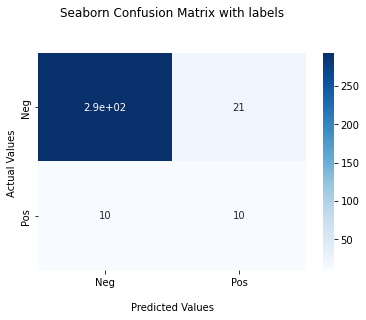

In [ ]:
ax = sns.heatmap(confusion_matrix(y_test,best_tree_predictions_2), annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['Neg','Pos'])
ax.yaxis.set_ticklabels(['Neg','Pos'])

plt.show()
##10/20 TPR
##10/20 FNR
##21/314 FPR
##293/314 TNR

In [ ]:
auc = roc_auc_score(y_test, best_tree_predictions_2)
print('ROC AUC: %f' % auc)

ROC AUC: 0.716561


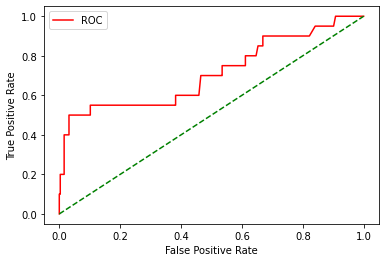

In [ ]:
prob_2 = b_model_2.predict_proba(X_test)
prob_2 = prob_2[:, 1]
fper_2, tper_2, thresholds_2 = roc_curve(y_test, prob_2)
plot_roc_curve(fper_2, tper_2)

In [ ]:
temp_2 = [fper_2, tper_2, thresholds_2]

In [ ]:
df_2=pd.DataFrame(temp_2)
df_2.T

,0,1,2
0,0.000000,0.00,1.930000
1,0.000000,0.05,0.930000
2,0.000000,0.10,0.886000
3,0.003185,0.10,0.873429
4,0.003185,0.20,0.850000
...,...,...,...
73,0.955414,1.00,0.009133
74,0.971338,1.00,0.008000
75,0.974522,1.00,0.007111
76,0.987261,1.00,0.006000


In [ ]:
True_Positive_2 = tper_2
# Find the optimal threshold
index_2 = np.argmax(True_Positive_2)
thresholdOpt_2 = round(thresholds_2[index_2], ndigits = 4)
True_Positive_Opt_2 = round(True_Positive_2[index_2], ndigits = 4)
print('Best Threshold: {} with True_Positive: {}'.format(thresholdOpt_2, True_Positive_Opt_2))

Best Threshold: 0.016 with True_Positive: 1.0


In [ ]:
gmean_2 = np.sqrt(tper_2 * (1 - fper_2))

# Find the optimal threshold
index_2 = np.argmax(gmean_2)
thresholdOpt_2 = round(thresholds_2[index_2], ndigits = 4)
gmeanOpt_2 = round(gmean_2[index_2], ndigits = 4)
fprOpt_2 = round(fper_2[index_2], ndigits = 4)
tprOpt_2 = round(tper_2[index_2], ndigits = 4)
print('Best Threshold: {} with G-Mean: {}'.format(thresholdOpt_2, gmeanOpt_2))
print('FPR: {}, TPR: {}'.format(fprOpt_2, tprOpt_2))

Best Threshold: 0.4088 with G-Mean: 0.7028
FPR: 0.1019, TPR: 0.55


Text(0.5, 0, 'Relative Importance')

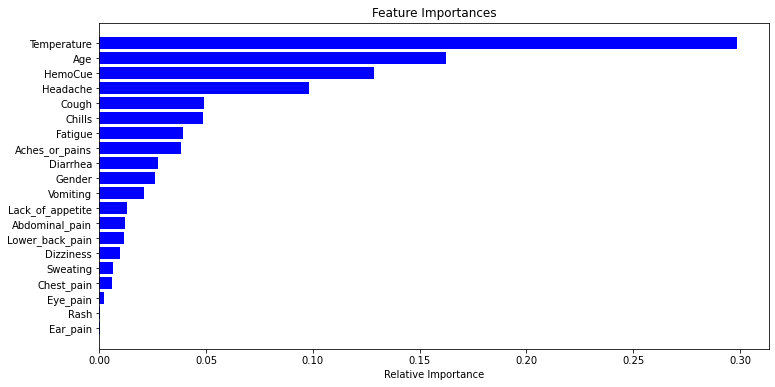

In [ ]:
feature_names = [key for key in df.drop(columns=["Malaria"])]
importances = b_model_2.feature_importances_
indices = np.argsort(importances)
indices = indices[-20:]
plt.figure(figsize=(12,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)),np.array(feature_names)[indices])
plt.xlabel('Relative Importance')

In [ ]:
tree_explainer_2 = shap.TreeExplainer(b_model_2, X_train,model_output="probability")

In [ ]:
shap_values_rf_2 = tree_explainer_2.shap_values(X_test,check_additivity=False)

100%|===================| 665/668 [01:09<00:00]       

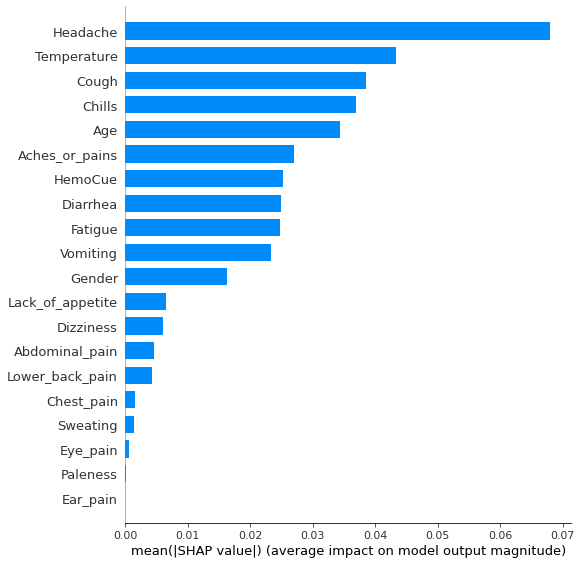

In [ ]:
shap.summary_plot(shap_values_rf_2[1], X_test, plot_type="bar")

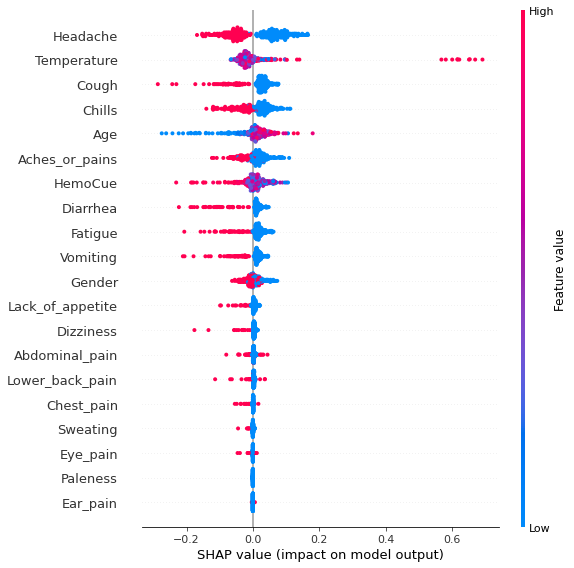

In [ ]:
shap.summary_plot(shap_values_rf_2[1], X_test)

##Precision recall curve

In [ ]:
from sklearn.metrics import f1_score 

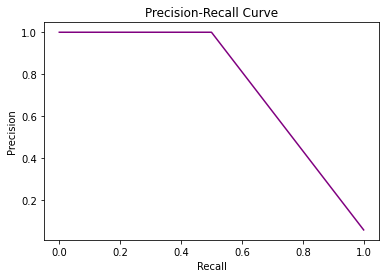

In [ ]:
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, best_tree_predictions)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

In [ ]:
df_recall_precision = pd.DataFrame({'Precision':precision[:-1],
                                    'Recall':recall[:-1],
                                    'Threshold':thresholds})
df_recall_precision.head()

,Precision,Recall,Threshold
0,0.05988,1.0,0
1,1.00000,0.5,1


In [ ]:
f1_scores = 2*recall*precision/(recall+precision)
print('Best threshold: ', thresholds[np.argmax(f1_scores)])
print('Best F1-Score: ', np.max(f1_scores))

Best threshold:  1
Best F1-Score:  0.6666666666666666


## Feature ablation method (Original dataset)

In [ ]:
set_threshold=0.0759

In [ ]:
# def score_model(X_train, X_test, y_train, y_test):
#   abl_model=RandomForestClassifier(max_depth=4,n_estimators=100)
#   abl_model.fit(X_train,y_train)
#   predicted_proba = abl_model.predict_proba(X_test)
#   predicted = (predicted_proba [:,1] >= set_threshold).astype('int')
#   return accuracy_score(y_test, predicted)

In [ ]:
from sklearn.metrics import average_precision_score

In [ ]:
def score_model(X_train, X_test, y_train, y_test):
  abl_model=RandomForestClassifier(max_depth=4,n_estimators=100)
  abl_model.fit(X_train,y_train)
  predicted_proba = abl_model.predict_proba(X_test)
  prob_list=list(predicted_proba)
  prob_array=np.array([item[1] for item in prob_list])
  predicted = (predicted_proba [:,1] >= set_threshold).astype('int')
  CM = confusion_matrix(y_test,predicted)
  TN = CM[0][0]
  FN = CM[1][0]
  TP = CM[1][1]
  FP = CM[0][1]
  TPR = TP/(TP+FN)
  TNR = TN/(TN+FP)
  PPV = TP/(TP+FP)
  F_one=2/((1/TP)+(1/PPV))
  auroc=roc_auc_score(y_test, predicted)
  auprc=average_precision_score(y_test, prob_array)
  return accuracy_score(y_test, predicted),TPR,TNR,F_one,auroc,auprc


In [ ]:
score_model(X_train, X_test, y_train, y_test)

(0.874251497005988,
 0.6,
 0.89171974522293,
 0.5106382978723404,
 0.745859872611465,
 0.574050713625219)

In [ ]:
base_acc = score_model(X_train, X_test, y_train, y_test)[0]
base_tpr = score_model(X_train, X_test, y_train, y_test)[1]
base_tnr = score_model(X_train, X_test, y_train, y_test)[2]
base_f_one = score_model(X_train, X_test, y_train, y_test)[3]
base_roc=score_model(X_train, X_test, y_train, y_test)[4]
base_prc=score_model(X_train, X_test, y_train, y_test)[5]

In [ ]:
# list(X_train.columns[use_column])

In [ ]:
# X_train[list(X_train.columns[use_column])]

In [ ]:
acc_list = []
tpr_list = []
tnr_list = []
f_one_list = []
roc_list=[]
prc_list=[]

In [ ]:
for i in range(X_train.shape[1]):
    use_column = [ndx != i for ndx in range(X_train.shape[1])]
    acc_list.append(score_model(X_train[list(X_train.columns[use_column])],X_test[list(X_train.columns[use_column])],y_train,y_test)[0])
    tpr_list.append(score_model(X_train[list(X_train.columns[use_column])],X_test[list(X_train.columns[use_column])],y_train,y_test)[1])
    tnr_list.append(score_model(X_train[list(X_train.columns[use_column])],X_test[list(X_train.columns[use_column])],y_train,y_test)[2])
    f_one_list.append(score_model(X_train[list(X_train.columns[use_column])],X_test[list(X_train.columns[use_column])],y_train,y_test)[3])
    roc_list.append(score_model(X_train[list(X_train.columns[use_column])],X_test[list(X_train.columns[use_column])],y_train,y_test)[4])
    prc_list.append(score_model(X_train[list(X_train.columns[use_column])],X_test[list(X_train.columns[use_column])],y_train,y_test)[5])

In [ ]:
sorted(enumerate([base_acc - s for s in acc_list]),key=lambda ndx_score: ndx_score[1],reverse=True)

[(1, 0.1107784431137725),
 (11, 0.03592814371257491),
 (5, 0.026946107784431184),
 (13, 0.017964071856287456),
 (15, 0.017964071856287456),
 (6, 0.014970059880239583),
 (17, 0.014970059880239583),
 (8, 0.011976047904191711),
 (0, 0.008982035928143728),
 (18, 0.008982035928143728),
 (9, 0.0029940119760479833),
 (10, 0.0029940119760479833),
 (16, 0.0029940119760479833),
 (2, 0.0),
 (20, 0.0),
 (4, -0.0059880239520957446),
 (7, -0.0059880239520957446),
 (14, -0.0059880239520957446),
 (3, -0.017964071856287345),
 (12, -0.03293413173652693),
 (19, -0.0359281437125748)]

In [ ]:
lst=sorted(enumerate([base_acc - s for s in acc_list]),key=lambda ndx_score: ndx_score[1],reverse=True)

In [ ]:
lst2 = [item[0] for item in lst]

In [ ]:
lst2

[1, 11, 5, 13, 15, 6, 17, 8, 0, 18, 9, 10, 16, 2, 20, 4, 7, 14, 3, 12, 19]

In [ ]:
for x in lst2:
  print(X_train.columns[x])

Temperature
Sweating
Aches_or_pains
Diarrhea
Eye_pain
Fatigue
Chest_pain
Lack_of_appetite
Age
Rash
Cough
Dizziness
Paleness
HemoCue
Gender
Chills
Vomiting
Lower_back_pain
Headache
Abdominal_pain
Ear_pain


Text(0.5, 0, 'Relative Importance')

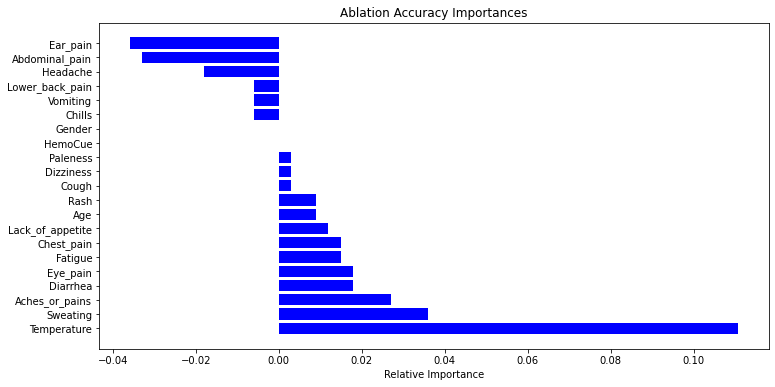

In [ ]:
feature_names = X_train.columns
importances = [item[1] for item in lst]
indices = [item[0] for item in lst]
plt.figure(figsize=(12,6))
plt.title('Ablation Accuracy Importances')
plt.barh(range(len(indices)), importances, color='b', align='center')
plt.yticks(range(len(indices)),np.array(feature_names)[indices])
plt.xlabel('Relative Importance')

In [ ]:
sorted(enumerate([base_tpr - s for s in tpr_list]),key=lambda ndx_score: ndx_score[1],reverse=True)

[(1, 0.15000000000000002),
 (12, 0.050000000000000044),
 (13, 0.050000000000000044),
 (17, 0.050000000000000044),
 (3, 0.0),
 (4, 0.0),
 (6, 0.0),
 (7, 0.0),
 (9, 0.0),
 (10, 0.0),
 (11, 0.0),
 (14, 0.0),
 (15, 0.0),
 (16, 0.0),
 (19, 0.0),
 (20, 0.0),
 (0, -0.04999999999999993),
 (2, -0.04999999999999993),
 (5, -0.04999999999999993),
 (8, -0.04999999999999993),
 (18, -0.04999999999999993)]

In [ ]:
lst=sorted(enumerate([base_tpr - s for s in tpr_list]),key=lambda ndx_score: ndx_score[1],reverse=True)

In [ ]:
lst2 = [item[0] for item in lst]

In [ ]:
for x in lst2:
  print(X_train.columns[x])

Temperature
Abdominal_pain
Diarrhea
Chest_pain
Headache
Chills
Fatigue
Vomiting
Cough
Dizziness
Sweating
Lower_back_pain
Eye_pain
Paleness
Ear_pain
Gender
Age
HemoCue
Aches_or_pains
Lack_of_appetite
Rash


Text(0.5, 0, 'Relative Importance')

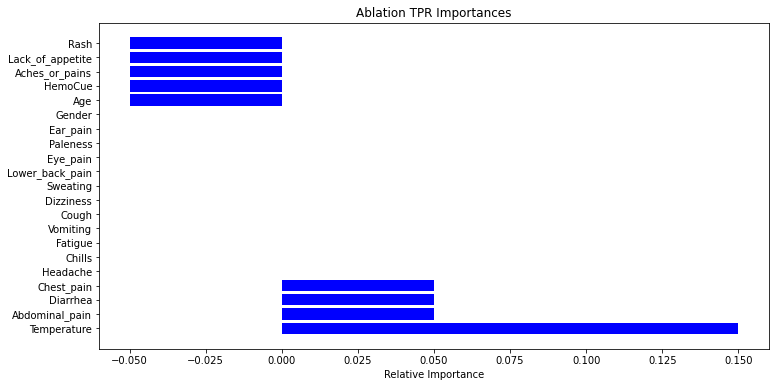

In [ ]:
feature_names = X_train.columns
importances = [item[1] for item in lst]
indices = [item[0] for item in lst]
plt.figure(figsize=(12,6))
plt.title('Ablation TPR Importances')
plt.barh(range(len(indices)), importances, color='b', align='center')
plt.yticks(range(len(indices)),np.array(feature_names)[indices])
plt.xlabel('Relative Importance')

In [ ]:
sorted(enumerate([base_tnr - s for s in tnr_list]),key=lambda ndx_score: ndx_score[1],reverse=True)

[(1, 0.07006369426751591),
 (8, 0.006369426751592355),
 (11, 0.006369426751592355),
 (0, -0.0031847133757961776),
 (7, -0.0031847133757961776),
 (9, -0.0031847133757961776),
 (2, -0.006369426751592355),
 (10, -0.006369426751592355),
 (4, -0.009554140127388533),
 (6, -0.009554140127388533),
 (15, -0.009554140127388533),
 (16, -0.009554140127388533),
 (17, -0.01273885350318471),
 (18, -0.01273885350318471),
 (19, -0.01273885350318471),
 (20, -0.01273885350318471),
 (5, -0.022292993630573243),
 (13, -0.022292993630573243),
 (14, -0.02547770700636942),
 (3, -0.0286624203821656),
 (12, -0.05414012738853502)]

In [ ]:
lst=sorted(enumerate([base_tnr - s for s in tnr_list]),key=lambda ndx_score: ndx_score[1],reverse=True)

In [ ]:
lst2 = [item[0] for item in lst]

In [ ]:
for x in lst2:
  print(X_train.columns[x])

Temperature
Lack_of_appetite
Sweating
Age
Vomiting
Cough
HemoCue
Dizziness
Chills
Fatigue
Eye_pain
Paleness
Chest_pain
Rash
Ear_pain
Gender
Aches_or_pains
Diarrhea
Lower_back_pain
Headache
Abdominal_pain


Text(0.5, 0, 'Relative Importance')

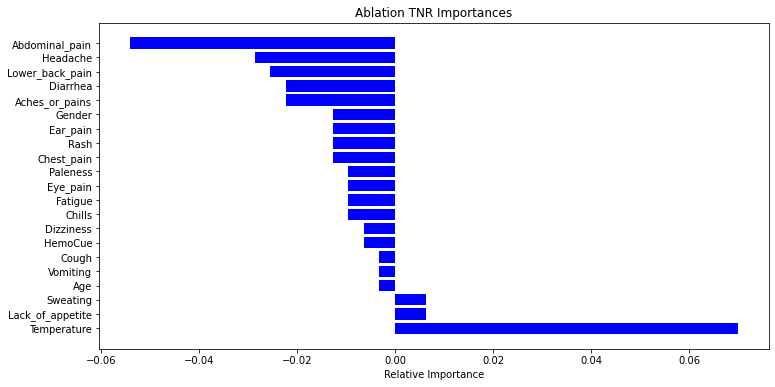

In [ ]:
feature_names = X_train.columns
importances = [item[1] for item in lst]
indices = [item[0] for item in lst]
plt.figure(figsize=(12,6))
plt.title('Ablation TNR Importances')
plt.barh(range(len(indices)), importances, color='b', align='center')
plt.yticks(range(len(indices)),np.array(feature_names)[indices])
plt.xlabel('Relative Importance')

In [ ]:
sorted(enumerate([base_f_one - s for s in f_one_list]),key=lambda ndx_score: ndx_score[1],reverse=True)

[(1, 0.3112332531776022),
 (7, 0.11350844277673544),
 (11, 0.11350844277673544),
 (17, 0.09658536585365851),
 (19, 0.09658536585365851),
 (16, 0.09214092140921415),
 (10, 0.0782520325203252),
 (2, 0.06599713055954093),
 (18, 0.06599713055954093),
 (5, 0.05832449628844116),
 (3, 0.056585365853658476),
 (4, 0.056585365853658476),
 (20, 0.047696476964769696),
 (8, 0.03658536585365846),
 (14, 0.0),
 (15, -0.0039551746868820015),
 (6, -0.027517198248905528),
 (0, -0.03484320557491283),
 (9, -0.03484320557491283),
 (13, -0.042362002567394086),
 (12, -0.17309205350118007)]

In [ ]:
lst=sorted(enumerate([base_f_one - s for s in f_one_list]),key=lambda ndx_score: ndx_score[1],reverse=True)

In [ ]:
lst2 = [item[0] for item in lst]

In [ ]:
for x in lst2:
  print(X_train.columns[x])

Temperature
Vomiting
Sweating
Chest_pain
Ear_pain
Paleness
Dizziness
HemoCue
Rash
Aches_or_pains
Headache
Chills
Gender
Lack_of_appetite
Lower_back_pain
Eye_pain
Fatigue
Age
Cough
Diarrhea
Abdominal_pain


Text(0.5, 0, 'Relative Importance')

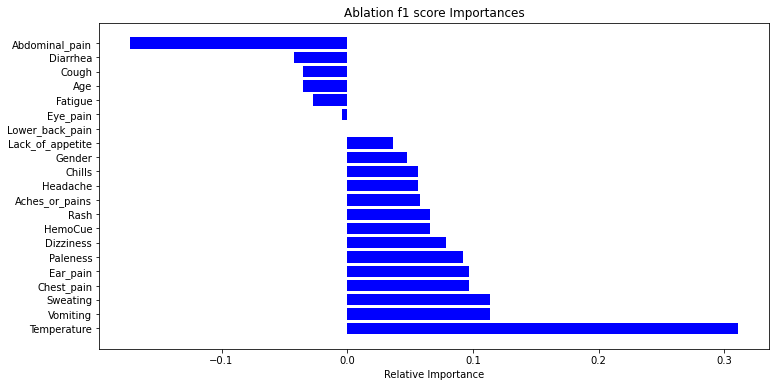

In [ ]:
feature_names = X_train.columns
importances = [item[1] for item in lst]
indices = [item[0] for item in lst]
plt.figure(figsize=(12,6))
plt.title('Ablation f1 score Importances')
plt.barh(range(len(indices)), importances, color='b', align='center')
plt.yticks(range(len(indices)),np.array(feature_names)[indices])
plt.xlabel('Relative Importance')

In [ ]:
sorted(enumerate([base_roc - s for s in roc_list]),key=lambda ndx_score: ndx_score[1],reverse=True)

[(1, 0.16050955414012757),
 (11, 0.04570063694267523),
 (15, 0.0441082802547772),
 (5, 0.042515923566879055),
 (9, 0.04092356687898091),
 (16, 0.03933121019108288),
 (4, 0.0361464968152867),
 (13, 0.0361464968152867),
 (17, 0.034554140127388666),
 (20, 0.034554140127388666),
 (3, 0.03296178343949052),
 (14, 0.03296178343949052),
 (18, 0.03296178343949052),
 (7, 0.03136942675159249),
 (6, 0.027070063694267565),
 (2, 0.017515923566879033),
 (19, 0.017515923566879033),
 (12, 0.017038216560509634),
 (10, 0.015923566878980888),
 (8, 0.01273885350318471),
 (0, -0.0011146496815285234)]

In [ ]:
lst=sorted(enumerate([base_roc - s for s in roc_list]),key=lambda ndx_score: ndx_score[1],reverse=True)

In [ ]:
lst2 = [item[0] for item in lst]

In [ ]:
for x in lst2:
  print(X_train.columns[x])

Temperature
Sweating
Eye_pain
Aches_or_pains
Cough
Paleness
Chills
Diarrhea
Chest_pain
Gender
Headache
Lower_back_pain
Rash
Vomiting
Fatigue
HemoCue
Ear_pain
Abdominal_pain
Dizziness
Lack_of_appetite
Age


Text(0.5, 0, 'Relative Importance')

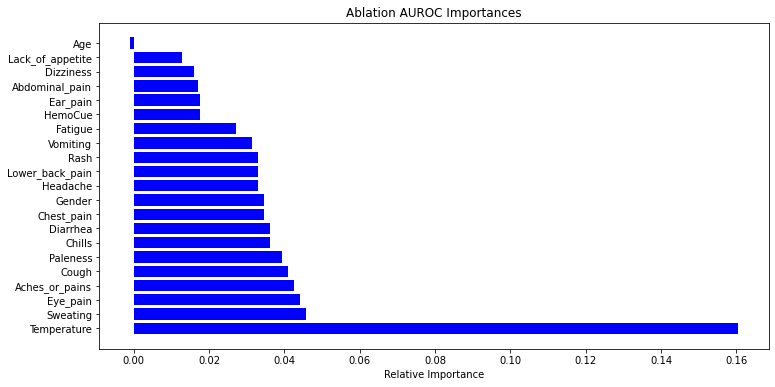

In [ ]:
feature_names = X_train.columns
importances = [item[1] for item in lst]
indices = [item[0] for item in lst]
plt.figure(figsize=(12,6))
plt.title('Ablation AUROC Importances')
plt.barh(range(len(indices)), importances, color='b', align='center')
plt.yticks(range(len(indices)),np.array(feature_names)[indices])
plt.xlabel('Relative Importance')

In [ ]:
sorted(enumerate([base_prc - s for s in prc_list]),key=lambda ndx_score: ndx_score[1],reverse=True)

[(1, 0.35961129975113626),
 (8, 0.004236452604794216),
 (14, 0.004231810517000056),
 (6, 0.0032935003164992205),
 (3, 0.0012682186914555471),
 (0, 0.0003866902073426104),
 (18, -0.00016472025358560405),
 (11, -0.0009442547749188845),
 (2, -0.0013618754521387277),
 (20, -0.001364096628484357),
 (4, -0.0020582540811148187),
 (12, -0.0037501848086077816),
 (10, -0.005006864994255289),
 (16, -0.006836207009652706),
 (5, -0.00840505130294944),
 (15, -0.009233301496267443),
 (7, -0.010743395618156626),
 (17, -0.012346394659200954),
 (19, -0.012782775981304062),
 (9, -0.012807237107526626),
 (13, -0.028415055708141068)]

In [ ]:
lst=sorted(enumerate([base_prc - s for s in prc_list]),key=lambda ndx_score: ndx_score[1],reverse=True)

In [ ]:
lst2 = [item[0] for item in lst]

In [ ]:
for x in lst2:
  print(X_train.columns[x])

Temperature
Lack_of_appetite
Lower_back_pain
Fatigue
Headache
Age
Rash
Sweating
HemoCue
Gender
Chills
Abdominal_pain
Dizziness
Paleness
Aches_or_pains
Eye_pain
Vomiting
Chest_pain
Ear_pain
Cough
Diarrhea


Text(0.5, 0, 'Relative Importance')

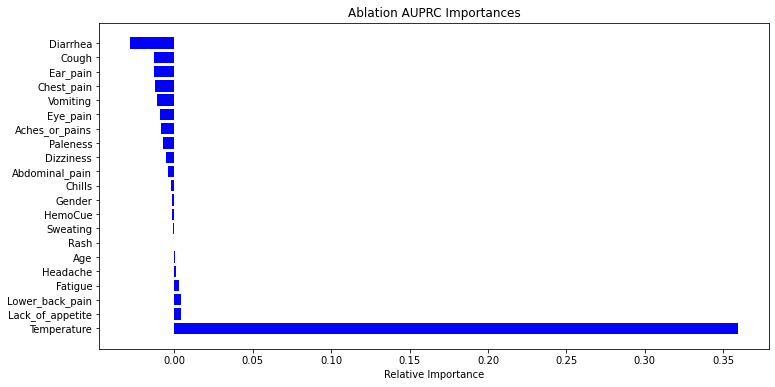

In [ ]:
feature_names = X_train.columns
importances = [item[1] for item in lst]
indices = [item[0] for item in lst]
plt.figure(figsize=(12,6))
plt.title('Ablation AUPRC Importances')
plt.barh(range(len(indices)), importances, color='b', align='center')
plt.yticks(range(len(indices)),np.array(feature_names)[indices])
plt.xlabel('Relative Importance')

## Feature ablation wih non-informative value (Original dataset)


In [ ]:
median = X_train.median()
mode = X_train.mode().iloc[0]
t = np.append(np.array(median[:3]),np.array(mode[3:]))

In [ ]:
t

array([30.  , 98.45, 12.6 ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  1.  ])

In [ ]:
acc_list_2 = []
tpr_list_2 = []
tnr_list_2 = []
f_one_list_2 = []
roc_list_2=[]
prc_list_2=[]

In [ ]:
for i in range(X_train.shape[1]):
  X_temp=X_train.copy()
  X_temp_2=X_test.copy()
  X_temp[X_temp.columns[i]]=t[i]
  # print(X_temp.head(5))
  X_temp_2[X_temp_2.columns[i]]=t[i]
  # dict[X_train.columns[i]]
  # X_train[X_train.columns[i]]=t[i]
  # X_test[X_test.columns[i]]=t[i]
  acc_list_2.append(score_model(X_temp,X_temp_2,y_train,y_test)[0])
  tpr_list_2.append(score_model(X_temp,X_temp_2,y_train,y_test)[1])
  tnr_list_2.append(score_model(X_temp,X_temp_2,y_train,y_test)[2])
  f_one_list_2.append(score_model(X_temp,X_temp_2,y_train,y_test)[3])
  roc_list_2.append(score_model(X_temp,X_temp_2,y_train,y_test)[4])
  prc_list_2.append(score_model(X_temp,X_temp_2,y_train,y_test)[5])



In [ ]:
sorted(enumerate([base_acc - s for s in acc_list_2]),
       key=lambda ndx_score: ndx_score[1],
       reverse=True)

[(1, 0.0988023952095809),
 (8, 0.03293413173652704),
 (19, 0.03293413173652704),
 (13, 0.029940119760479056),
 (14, 0.029940119760479056),
 (16, 0.02095808383233544),
 (20, 0.02095808383233544),
 (6, 0.017964071856287456),
 (2, 0.014970059880239583),
 (10, 0.011976047904191711),
 (0, 0.008982035928143728),
 (15, 0.008982035928143728),
 (18, 0.008982035928143728),
 (17, 0.005988023952095856),
 (4, 0.0029940119760479833),
 (7, 0.0029940119760479833),
 (9, 0.0029940119760479833),
 (11, 0.0),
 (5, -0.0029940119760478723),
 (3, -0.0059880239520957446),
 (12, -0.017964071856287345)]

In [ ]:
lst_3=sorted(enumerate([base_acc - s for s in acc_list_2]),key=lambda ndx_score: ndx_score[1],reverse=True)

In [ ]:
lst_4 = [item[0] for item in lst_3]

In [ ]:
for x in lst_4:
  print(X_train.columns[x])

Temperature
Lack_of_appetite
Ear_pain
Diarrhea
Lower_back_pain
Paleness
Gender
Fatigue
HemoCue
Dizziness
Age
Eye_pain
Rash
Chest_pain
Chills
Vomiting
Cough
Sweating
Aches_or_pains
Headache
Abdominal_pain


Text(0.5, 0, 'Relative Importance')

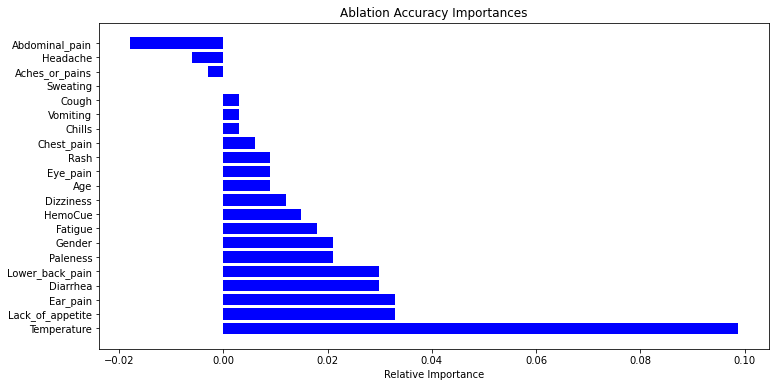

In [ ]:
feature_names = X_train.columns
importances = [item[1] for item in lst_3]
indices = [item[0] for item in lst_3]
plt.figure(figsize=(12,6))
plt.title('Ablation Accuracy Importances')
plt.barh(range(len(indices)), importances, color='b', align='center')
plt.yticks(range(len(indices)),np.array(feature_names)[indices])
plt.xlabel('Relative Importance')

In [ ]:
sorted(enumerate([base_tpr - s for s in tpr_list_2]),
       key=lambda ndx_score: ndx_score[1],
       reverse=True)

[(1, 0.20000000000000007),
 (13, 0.050000000000000044),
 (0, 0.0),
 (2, 0.0),
 (3, 0.0),
 (4, 0.0),
 (7, 0.0),
 (8, 0.0),
 (9, 0.0),
 (10, 0.0),
 (11, 0.0),
 (12, 0.0),
 (14, 0.0),
 (17, 0.0),
 (18, 0.0),
 (19, 0.0),
 (5, -0.04999999999999993),
 (6, -0.04999999999999993),
 (15, -0.04999999999999993),
 (16, -0.04999999999999993),
 (20, -0.04999999999999993)]

In [ ]:
lst_3=sorted(enumerate([base_tpr - s for s in tpr_list_2]),
       key=lambda ndx_score: ndx_score[1],
       reverse=True)

In [ ]:
lst_4 = [item[0] for item in lst_3]

In [ ]:
for x in lst_4:
  print(X_train.columns[x])

Temperature
Diarrhea
Age
HemoCue
Headache
Chills
Vomiting
Lack_of_appetite
Cough
Dizziness
Sweating
Abdominal_pain
Lower_back_pain
Chest_pain
Rash
Ear_pain
Aches_or_pains
Fatigue
Eye_pain
Paleness
Gender


Text(0.5, 0, 'Relative Importance')

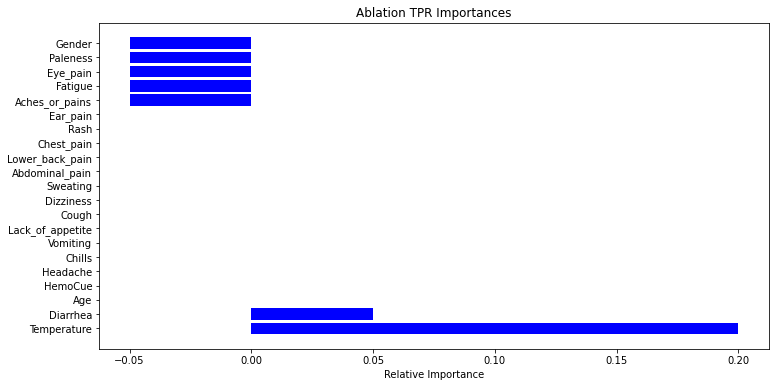

In [ ]:
feature_names = X_train.columns
importances = [item[1] for item in lst_3]
indices = [item[0] for item in lst_3]
plt.figure(figsize=(12,6))
plt.title('Ablation TPR Importances')
plt.barh(range(len(indices)), importances, color='b', align='center')
plt.yticks(range(len(indices)),np.array(feature_names)[indices])
plt.xlabel('Relative Importance')

In [ ]:
sorted(enumerate([base_tnr - s for s in tnr_list_2]),
       key=lambda ndx_score: ndx_score[1],
       reverse=True)

[(1, 0.060509554140127375),
 (0, 0.015923566878980888),
 (11, 0.006369426751592355),
 (8, 0.0031847133757961776),
 (9, -0.0031847133757961776),
 (2, -0.006369426751592355),
 (15, -0.006369426751592355),
 (14, -0.01273885350318471),
 (19, -0.01273885350318471),
 (4, -0.015923566878980888),
 (17, -0.015923566878980888),
 (18, -0.019108280254777066),
 (20, -0.019108280254777066),
 (13, -0.022292993630573243),
 (3, -0.02547770700636942),
 (16, -0.02547770700636942),
 (5, -0.0286624203821656),
 (7, -0.0286624203821656),
 (10, -0.035031847133757954),
 (12, -0.047770700636942665),
 (6, -0.05414012738853502)]

In [ ]:
lst_3=sorted(enumerate([base_tnr - s for s in tnr_list_2]),
       key=lambda ndx_score: ndx_score[1],
       reverse=True)

In [ ]:
lst_4 = [item[0] for item in lst_3]

In [ ]:
for x in lst_4:
  print(X_train.columns[x])

Temperature
Age
Sweating
Lack_of_appetite
Cough
HemoCue
Eye_pain
Lower_back_pain
Ear_pain
Chills
Chest_pain
Rash
Gender
Diarrhea
Headache
Paleness
Aches_or_pains
Vomiting
Dizziness
Abdominal_pain
Fatigue


Text(0.5, 0, 'Relative Importance')

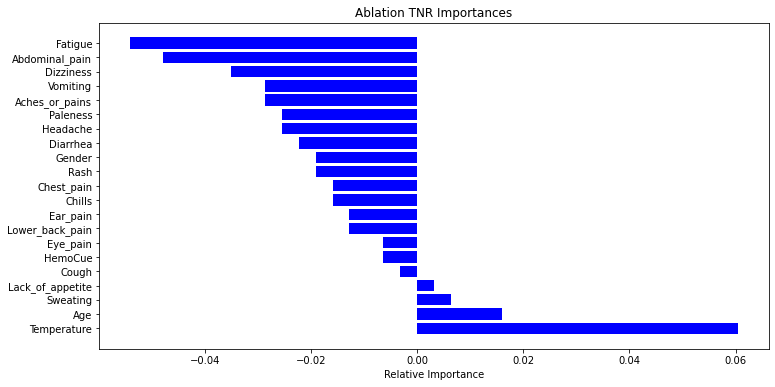

In [ ]:
feature_names = X_train.columns
importances = [item[1] for item in lst_3]
indices = [item[0] for item in lst_3]
plt.figure(figsize=(12,6))
plt.title('Ablation TNR Importances')
plt.barh(range(len(indices)), importances, color='b', align='center')
plt.yticks(range(len(indices)),np.array(feature_names)[indices])
plt.xlabel('Relative Importance')

In [ ]:
sorted(enumerate([base_f_one - s for s in f_one_list_2]),
       key=lambda ndx_score: ndx_score[1],
       reverse=True)

[(1, 0.3232520325203252),
 (7, 0.10521281683405076),
 (6, 0.09658536585365851),
 (8, 0.08760577401692393),
 (3, 0.0782520325203252),
 (20, 0.0782520325203252),
 (15, 0.075046904315197),
 (5, 0.06850025947067984),
 (10, 0.056585365853658476),
 (0, 0.047696476964769696),
 (2, 0.047696476964769696),
 (9, 0.047696476964769696),
 (17, 0.03658536585365857),
 (18, 0.03658536585365846),
 (19, 0.03658536585365846),
 (14, 0.024957458876914362),
 (13, 0.012775842044134733),
 (16, 0.012775842044134733),
 (11, -0.008869179600886845),
 (4, -0.021554169030062353),
 (12, -0.15091463414634154)]

In [ ]:
lst_3=sorted(enumerate([base_f_one - s for s in f_one_list_2]),
       key=lambda ndx_score: ndx_score[1],
       reverse=True)

In [ ]:
lst_4 = [item[0] for item in lst_3]

In [ ]:
for x in lst_4:
  print(X_train.columns[x])

Temperature
Vomiting
Fatigue
Lack_of_appetite
Headache
Gender
Eye_pain
Aches_or_pains
Dizziness
Age
HemoCue
Cough
Chest_pain
Rash
Ear_pain
Lower_back_pain
Diarrhea
Paleness
Sweating
Chills
Abdominal_pain


Text(0.5, 0, 'Relative Importance')

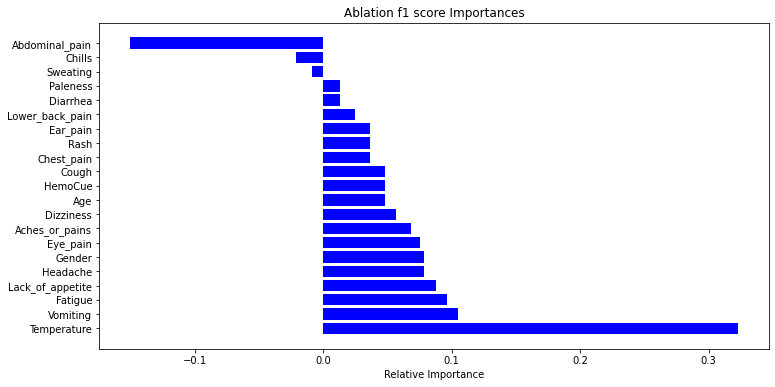

In [ ]:
feature_names = X_train.columns
importances = [item[1] for item in lst_3]
indices = [item[0] for item in lst_3]
plt.figure(figsize=(12,6))
plt.title('Ablation f1 score Importances')
plt.barh(range(len(indices)), importances, color='b', align='center')
plt.yticks(range(len(indices)),np.array(feature_names)[indices])
plt.xlabel('Relative Importance')

In [ ]:
sorted(enumerate([base_roc - s for s in roc_list_2]),
       key=lambda ndx_score: ndx_score[1],
       reverse=True)

[(1, 0.17117834394904463),
 (20, 0.04888535031847141),
 (16, 0.04570063694267523),
 (3, 0.0441082802547772),
 (10, 0.0441082802547772),
 (6, 0.042515923566879055),
 (8, 0.04092356687898091),
 (9, 0.03933121019108288),
 (17, 0.03933121019108288),
 (19, 0.03933121019108288),
 (13, 0.03773885350318473),
 (5, 0.0361464968152867),
 (0, 0.034554140127388666),
 (7, 0.034554140127388666),
 (18, 0.029777070063694344),
 (14, 0.0281847133757962),
 (11, 0.027070063694267565),
 (2, 0.02070063694267521),
 (15, 0.02070063694267521),
 (4, 0.0079617834394905),
 (12, -0.009554140127388533)]

In [ ]:
lst_3=sorted(enumerate([base_roc - s for s in roc_list_2]),
       key=lambda ndx_score: ndx_score[1],
       reverse=True)

In [ ]:
lst_4 = [item[0] for item in lst_3]

In [ ]:
for x in lst_4:
  print(X_train.columns[x])

Temperature
Gender
Paleness
Headache
Dizziness
Fatigue
Lack_of_appetite
Cough
Chest_pain
Ear_pain
Diarrhea
Aches_or_pains
Age
Vomiting
Rash
Lower_back_pain
Sweating
HemoCue
Eye_pain
Chills
Abdominal_pain


Text(0.5, 0, 'Relative Importance')

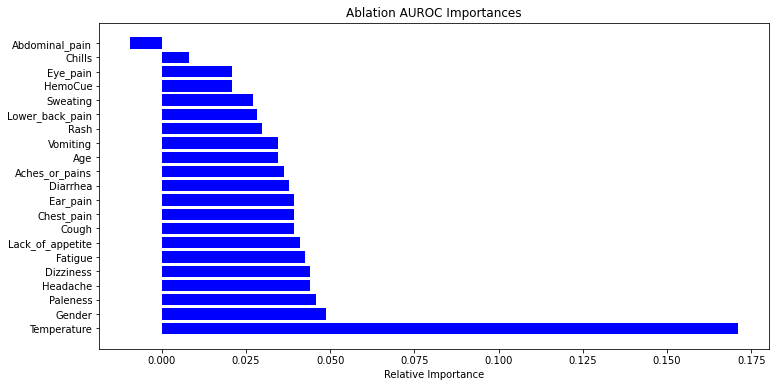

In [ ]:
feature_names = X_train.columns
importances = [item[1] for item in lst_3]
indices = [item[0] for item in lst_3]
plt.figure(figsize=(12,6))
plt.title('Ablation AUROC Importances')
plt.barh(range(len(indices)), importances, color='b', align='center')
plt.yticks(range(len(indices)),np.array(feature_names)[indices])
plt.xlabel('Relative Importance')

In [ ]:
sorted(enumerate([base_prc - s for s in prc_list_2]),
       key=lambda ndx_score: ndx_score[1],
       reverse=True)

[(1, 0.4334536146512625),
 (13, 0.012293780796667875),
 (18, 0.005170540426565617),
 (12, 0.005107303235796223),
 (16, 0.004103086420522373),
 (15, 0.00011352041746892638),
 (4, -0.0004076786422642087),
 (11, -0.0010625413753118096),
 (9, -0.001325729225807759),
 (17, -0.0016949060572798436),
 (2, -0.0020635432970220746),
 (20, -0.002959278478303129),
 (10, -0.0037199495202983046),
 (8, -0.004152330800980764),
 (19, -0.005748718982562684),
 (14, -0.008304684131575146),
 (6, -0.0092697775859224),
 (7, -0.010016101944248179),
 (3, -0.011208171813365086),
 (0, -0.014761303397621939),
 (5, -0.02524749358804179)]

In [ ]:
lst_3=sorted(enumerate([base_prc - s for s in prc_list_2]),
       key=lambda ndx_score: ndx_score[1],
       reverse=True)

In [ ]:
lst_4 = [item[0] for item in lst_3]

In [ ]:
for x in lst_4:
  print(X_train.columns[x])

Temperature
Diarrhea
Rash
Abdominal_pain
Paleness
Eye_pain
Chills
Sweating
Cough
Chest_pain
HemoCue
Gender
Dizziness
Lack_of_appetite
Ear_pain
Lower_back_pain
Fatigue
Vomiting
Headache
Age
Aches_or_pains


Text(0.5, 0, 'Relative Importance')

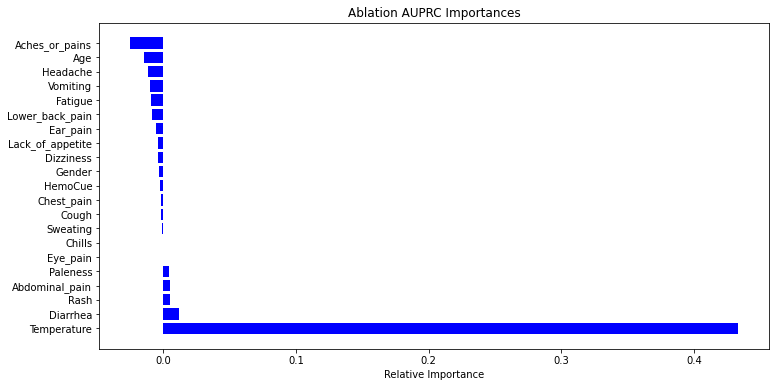

In [ ]:
feature_names = X_train.columns
importances = [item[1] for item in lst_3]
indices = [item[0] for item in lst_3]
plt.figure(figsize=(12,6))
plt.title('Ablation AUPRC Importances')
plt.barh(range(len(indices)), importances, color='b', align='center')
plt.yticks(range(len(indices)),np.array(feature_names)[indices])
plt.xlabel('Relative Importance')

## Faith (Original dataset)

In [ ]:
#  X_train.iloc[:,[3, 6, 7]]

In [ ]:
shap_values_rf_3 = tree_explainer.shap_values(X_train,check_additivity=False)

 99%|===================| 1983/2000 [00:31<00:00]       

In [ ]:
def generate(mask, x, n_sample):
    fixed_indices = np.where(mask) ##True
    variable_indices = np.where(mask == 0) ## False
    # mode, ,median
    i = list(variable_indices[0])
    X_cond = t[i]
    X = np.zeros((n_sample, len(mask)))
    # print(list(variable_indices[0]))
    # print(X[:,variable_indices].shape)
    X[:, list(variable_indices[0])] = X_cond
    X[:, list(fixed_indices[0])] = x[fixed_indices]
    # X[:, list(fixed_indices[0])] = x[fixed_indices]
    return X

In [ ]:
def faith(X, y, trained_model, feature_weights,X_train=None, y_train=None, n_sample=100, X_train_feature_weights=None):

    X = X.values
    num_datapoints, num_features = X.shape
    absolute_weights = np.abs(feature_weights)

    
    model_predict = trained_model.predict_proba(X)    

    faithfulnesses = []
    for i in range(num_datapoints):
        """
        for each datapoint i, compute the correlation between feature weights
        and the delta in prediction when ablating each feature with replacement
        """

        # original prediction      
        # y_pred = np.squeeze(model_predict[i][1])
        # y_pred = model_predict[i][1]
        y_pred = model_predict[i][1]
        # y_pred = np.mean(np.squeeze(model_predict))
        y_preds_new = np.zeros_like(np.array(X)[i]) # 21 0's

        for j in range(num_features):
            # generate a mask [1,1, ... 1]
            mask = np.ones_like(np.array(X)[i]) # 21 1's
            mask[j] = 0
            # mask = 1 - mask
            # sample n_sample datapoints with feature j ablated
            x_sampled = generate(mask=mask, x=np.array(X)[i], n_sample=n_sample)
            # sampled=pd.concat([x_sampled, np.zeros_like(y)], axis=1)
            # print(i, x_sampled)
            y_pred_new=np.array([item[1] for item in list(trained_model.predict_proba(x_sampled))])
            # y_pred_new = trained_model.predict_proba(x_sampled)
            # compute mean over n
            y_preds_new[j] = np.mean(y_pred_new) ## Plug in new pred prob in place of  0's
            # y_preds_new[j] = np.mean(np.squeeze(y_pred_new))

        # print('y_pred', y_pred, 'y_pred_new', y_preds_new[j], 'result', y_pred - y_preds_new[j])
        deltas = [abs(y_pred - y_preds_new[j]) for j in range(num_features)]
        
        faithfulness = np.corrcoef(absolute_weights[i], deltas)[0, 1]
        # if np.isnan(faithfulness) or not np.isfinite(faithfulness):
        #     faithfulness = 0
        faithfulnesses.append(faithfulness)

    return np.mean(faithfulnesses)

In [ ]:
faith(X_train, y_train, b_model, shap_values_rf_3[1])

0.41854003188559974

##Monotocity (Original dataset)

In [ ]:
def mono(X, y, trained_model, feature_weights,  avg=True, X_train=None, y_train=None, n_sample=100, X_train_feature_weights=None):
      X = X.values
      num_datapoints, num_features = X.shape
      absolute_weights = abs(feature_weights)

  
      model_predict = trained_model.predict_proba(X) 

      
      monotonicities = []

      y_preds_mean = np.mean(model_predict)

      for i in range(num_datapoints):
          mask = np.zeros_like(np.array(X)[i]) # 21 0's
          sorted_weight_indices = np.argsort(absolute_weights[i])
          sorted_weight_indices = sorted_weight_indices[::-1]
          y_preds_new = np.zeros(len(np.array(X)[i])+1) #22 0's
          y_preds_new[0] = y_preds_mean

          for j in sorted_weight_indices:
              mask[j] = 1
              x_sampled= generate(mask=mask, x=np.array(X)[i], n_sample=n_sample)
              y_pred_new=np.array([item[1] for item in list(trained_model.predict_proba(x_sampled))])
              y_preds_new[j+1] = np.mean(y_pred_new)

          # deltas = np.abs(np.diff(y_preds_new))
          order_list=list(sorted_weight_indices)#large to small
          new_order_preds=y_preds_new[order_list]
          new_order_preds=new_order_preds[::-1] #small to large
          deltas = np.abs(np.diff(new_order_preds))
          # deltas = deltas[::-1]
          monotonicity = sum(np.diff(deltas) >= 0) / (num_features-1)
          monotonicities.append(monotonicity)
      return np.mean(monotonicities)

In [ ]:
mono(X_train, y_train, b_model, shap_values_rf_3[1])

0.64695